In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# For example, here's several helpful packages to load

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

In [3]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [4]:
import os

directory = r'C:\Users\muski\Desktop\NewProject\Data'

for dirname, _, filenames in os.walk(directory):
    for filename in filenames:
        print(os.path.join(dirname, filename))


C:\Users\muski\Desktop\NewProject\Data\employee_data.csv
C:\Users\muski\Desktop\NewProject\Data\Fraud detection.twb
C:\Users\muski\Desktop\NewProject\Data\Insurance claims.ipynb
C:\Users\muski\Desktop\NewProject\Data\insurance_data.csv
C:\Users\muski\Desktop\NewProject\Data\vendor_data.csv
C:\Users\muski\Desktop\NewProject\Data\~Fraud detection__30904.twbr
C:\Users\muski\Desktop\NewProject\Data\.ipynb_checkpoints\Insurance claims-checkpoint.ipynb


In [5]:

vendor_data = pd.read_csv(r'C:\Users\muski\Desktop\NewProject\Data\vendor_data.csv')
insurance_data = pd.read_csv(r'C:\Users\muski\Desktop\NewProject\Data\insurance_data.csv')
employee_data = pd.read_csv(r'C:\Users\muski\Desktop\NewProject\Data\employee_data.csv')


In [6]:
vendor_data.head()
insurance_data.head()
employee_data.head()


,AGENT_ID,AGENT_NAME,DATE_OF_JOINING,ADDRESS_LINE1,CITY,STATE,POSTAL_CODE,EMP_ROUTING_NUMBER,EMP_ACCT_NUMBER
0,AGENT00001,Ray Johns,05/06/1993,1402 Maggies Way,Waterbury Center,VT,5677,34584958,HKUN51252328472585
1,AGENT00002,Angelo Borjon,27/12/2005,414 Tanya Pass,Panama City,FL,32404,107363763,OPIS19290040088204
2,AGENT00003,Candy Spellman,02/09/2003,606 National Street,Fayetteville,AR,72701,81744097,YSCJ67489688482590
3,AGENT00004,Mary Smith,23/09/2004,235 Hugh Thomas Drive,Panama City,FL,32404,67563771,ZANG21285355574581
4,AGENT00005,Mildred Diaz,21/06/2011,3426 Broadview Street,Montgomery,AL,36110,114951317,DZFS82244494451134


In [7]:
# TASK 1

In [8]:
# Merge the 3 dataset and create 1 view of data. 
# You can merge insurance_data.csv and employee_data.csv on AGENT_ID 
# You can merge insurance_data.csv and vendor_data.csv on VENDOR_ID Note: 
# Use left Outer join as not all claims require Vendor

In [9]:
emp_ins_data=pd.merge(employee_data, insurance_data, on="AGENT_ID")
emp_ins_ven_data=pd.merge(emp_ins_data, vendor_data, on="VENDOR_ID")
df=pd.merge(emp_ins_data, vendor_data, on="VENDOR_ID",how='left')

In [10]:
len(emp_ins_ven_data.columns)

50

In [11]:
# Task 2

In [12]:
# Top 3 Insurance Type where we are getting most insurance claims

In [13]:
def barplot(x, y, data, title, color):
    plt.figure(figsize= (10, 8))
    plt.title(title)
    sns.barplot(x= x, y= y, data= data, palette= color)
    plt.show()

In [14]:
insurance_type = pd.DataFrame(df['INSURANCE_TYPE'].value_counts()[:3])
insurance_type.columns = ['COUNT']
insurance_type['INSURANCE_TYPE'] = insurance_type.index
insurance_type.reset_index(drop= True, inplace= True) # dropping the index column
insurance_type

,COUNT,INSURANCE_TYPE
0,1692,Property
1,1692,Mobile
2,1690,Health


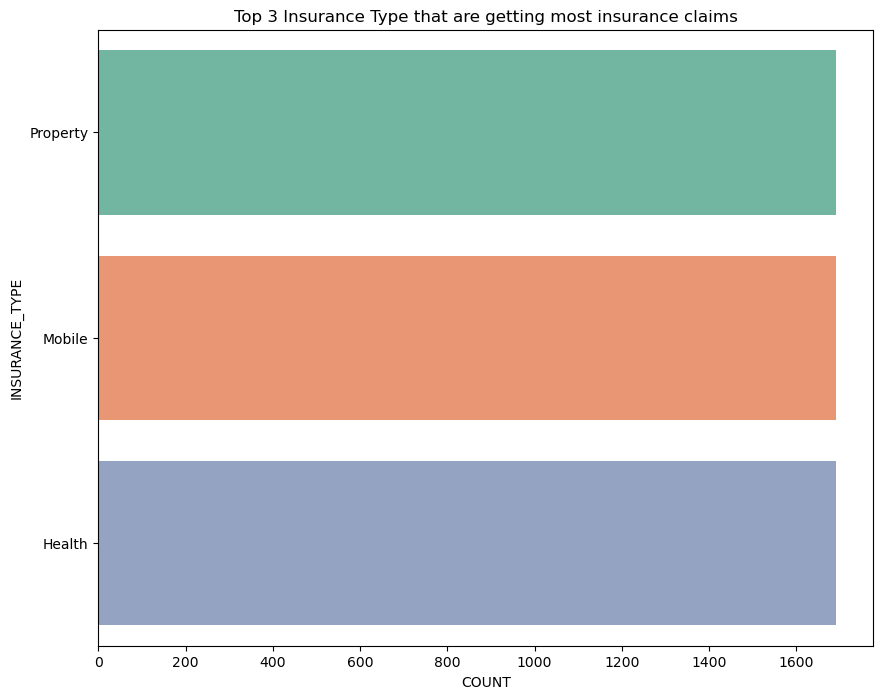

In [15]:
barplot('COUNT', 'INSURANCE_TYPE', insurance_type, 
        "Top 3 Insurance Type that are getting most insurance claims", "Set2")

In [16]:
# TASK 3 


In [17]:
#top 3 insurance type where we are getting most insureance claims.

In [18]:
df.groupby('INSURANCE_TYPE')['CLAIM_AMOUNT'].count().reset_index().sort_values('CLAIM_AMOUNT',ascending=False)



,INSURANCE_TYPE,CLAIM_AMOUNT
2,Mobile,1692
4,Property,1692
0,Health,1690
1,Life,1682
5,Travel,1670
3,Motor,1574


In [19]:
# TASK 4


In [20]:
#Top 5 states where we are getting most insurance claims for customers belonging to high(H) risk segment.

In [21]:
high_risk_seg = df.loc[df['RISK_SEGMENTATION'] == 'H']

high_risk_states = pd.DataFrame(high_risk_seg['STATE_y'].value_counts()[:5])
high_risk_states.columns = ['COUNT']
high_risk_states['STATES'] = high_risk_states.index
high_risk_states.reset_index(drop= True, inplace= True)
high_risk_states

,COUNT,STATES
0,148,CA
1,105,AZ
2,104,FL
3,100,TN
4,97,AR


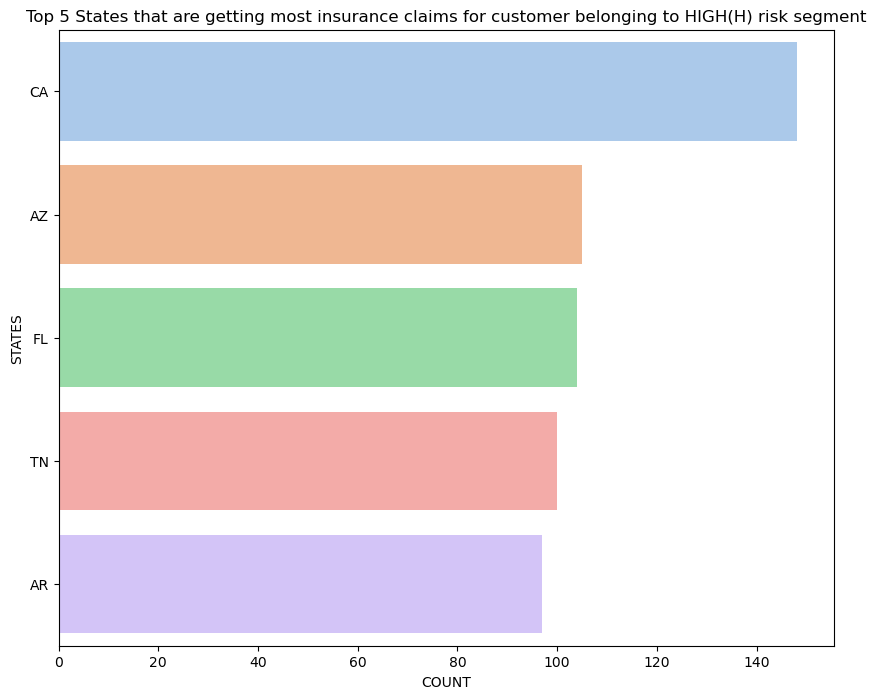

In [22]:
barplot('COUNT', 'STATES', high_risk_states, 
        "Top 5 States that are getting most insurance claims for customer belonging to HIGH(H) risk segment", 
        'pastel')

In [23]:
# TASK 5

In [24]:
#Business wants to find suspicious agents.
#if 'CLAIM_STATUS'=='Approved' and 'RISK+SEGMENTATION'=='high' and 'INCIDENT_SEVERITY'=='Major_Loss'
#IF suspicious ten 1 else 0.

In [25]:
df[['CLAIM_STATUS','RISK_SEGMENTATION','INCIDENT_SEVERITY']].head()


,CLAIM_STATUS,RISK_SEGMENTATION,INCIDENT_SEVERITY
0,A,L,Minor Loss
1,A,L,Total Loss
2,A,H,Major Loss
3,A,H,Total Loss
4,A,H,Minor Loss


In [26]:
sus = df[(df['CLAIM_STATUS'] == 'A') & (df['RISK_SEGMENTATION'] == 'H') & (df['INCIDENT_SEVERITY'] == 'Major Loss')]

In [27]:
cond1 = [
    sus['CLAIM_AMOUNT'] >= 15000
]
values1 = [1]

In [28]:
sus.loc[:, 'SUSPICIOUS'] = np.select(cond1, values1)

C:\Users\muski\AppData\Local\Temp\ipykernel_42960\3796447296.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sus.loc[:, 'SUSPICIOUS'] = np.select(cond1, values1)


In [29]:
# suspicious agents are 1 and non_suspicious are 0 based on claim amount.

In [30]:
sus[['AGENT_NAME','CLAIM_AMOUNT','SUSPICIOUS']].head(15)

,AGENT_NAME,CLAIM_AMOUNT,SUSPICIOUS
2,Ray Johns,39000,1
19,Candy Spellman,44000,1
59,Michael Hoskins,3000,0
84,Nancy Coronado,200,0
90,Nancy Coronado,10000,0
97,Nancy Coronado,38000,1
116,Carolyn Jones,1000,0
146,Rita Allaire,200,0
150,Rita Allaire,100,0
166,Robert Barnes,20000,1


In [31]:
#Task 6

In [32]:
#“COLOCATION” 
#which will have following values IF Customer State == Incident State == 
#Agent Address State THEN 1 ELSE 0 Find the mean of this new column

In [33]:
df['COLOCATION']=np.where((df['STATE_y']==df['INCIDENT_STATE'])&(df['STATE_y']==df['STATE_x']),1,0)

In [34]:
df2=df.loc[(df['COLOCATION'] != 0)].head()
df2[['COLOCATION','STATE_y','INCIDENT_STATE','STATE_x']].head()

,COLOCATION,STATE_y,INCIDENT_STATE,STATE_x
522,1,AZ,AZ,AZ
715,1,KY,KY,KY
946,1,CT,CT,CT
1080,1,CA,CA,CA
1313,1,DC,DC,DC


In [35]:
# Task 7

In [36]:
# For any claim transaction 
# “AUTHORITY_CONTACTED” is NOT “Police” and POLICE_AVAILABLE == 1 
# Then Update “AUTHORITY_CONTACTED” to Police.

In [37]:
df.loc[(df['AUTHORITY_CONTACTED'] != 'Police') & (df['POLICE_REPORT_AVAILABLE'] == 1), 'AUTHORITY_CONTACTED'] = 'Police'

In [38]:
df[['AUTHORITY_CONTACTED', 'POLICE_REPORT_AVAILABLE']].head(10)

,AUTHORITY_CONTACTED,POLICE_REPORT_AVAILABLE
0,Police,1
1,Police,1
2,Police,1
3,Police,1
4,Police,1
5,Police,1
6,Police,1
7,Police,1
8,Police,1
9,Police,1


In [39]:
df.AUTHORITY_CONTACTED.value_counts()

AUTHORITY_CONTACTED
Police       7852
Ambulance    1261
Other         309
Name: count, dtype: int64

In [40]:
# Task 8

In [41]:
# Find All Agents who have worked on more than 2 types of Insurance Claims. 
# Sort them by Total Claim Amount Approved under them in descending order

In [42]:
Aworks = df.groupby(
    ['AGENT_ID', 'AGENT_NAME', 'CLAIM_AMOUNT'])['INSURANCE_TYPE'].count().reset_index().sort_values('INSURANCE_TYPE', ascending= False)

In [43]:
Aworks.head()

,AGENT_ID,AGENT_NAME,CLAIM_AMOUNT,INSURANCE_TYPE
5429,AGENT00723,Thomas Phariss,5000,4
2909,AGENT00385,Sarah Pearce,5000,4
3002,AGENT00396,Majorie Holt,3000,4
1081,AGENT00147,Brian Webb,700,4
1666,AGENT00224,Evelyn Ortiz,3000,4


In [44]:
Aworks.tail()

,AGENT_ID,AGENT_NAME,CLAIM_AMOUNT,INSURANCE_TYPE
3149,AGENT00414,Christine Carter,38000,1
3148,AGENT00414,Christine Carter,26000,1
3147,AGENT00414,Christine Carter,20000,1
3146,AGENT00414,Christine Carter,18000,1
8942,AGENT01200,Virginia Stachura,56000,1


In [45]:
# Task 9

In [46]:
# Top 3 Insurance Type where we are getting most insurance claims in amounts

In [47]:
insurance_type =pd.DataFrame(df.groupby('INSURANCE_TYPE')
             ['CLAIM_AMOUNT'].sum()).sort_values(by='CLAIM_AMOUNT', ascending=False).head(3)
insurance_type.columns = ['COUNT']
insurance_type['INSURANCE_TYPE'] = insurance_type.index
insurance_type.reset_index(drop= True, inplace= True) # dropping the index column
insurance_type

,COUNT,INSURANCE_TYPE
0,91478000,Life
1,41579000,Property
2,18254000,Health


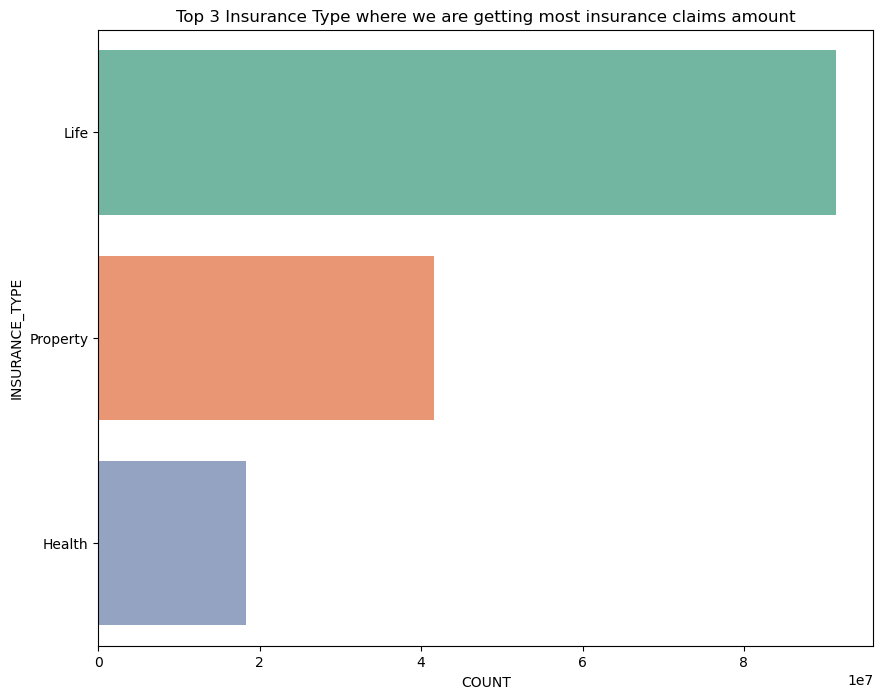

In [48]:
barplot('COUNT', 'INSURANCE_TYPE', insurance_type, 
        "Top 3 Insurance Type where we are getting most insurance claims amount", "Set2")

In [49]:
# Task 10 

In [50]:
#Simple regression model to predict Insurance premiums based on some features. 
#We'll use the scikit-learn library for this purpose.

In [51]:
X = insurance_data[['AGE', 'NO_OF_FAMILY_MEMBERS', 'TENURE']]
y = insurance_data['CLAIM_AMOUNT']

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [69]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [70]:
y_pred = model.predict(X_test)


In [71]:
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"R-squared (R2): {r2:.2f}")


Mean Absolute Error: 15989.24
R-squared (R2): -0.00
